In [2]:
import  numpy                as np
import  pandas               as pd
import  matplotlib.pyplot    as plt

from    sklearn.metrics        import ConfusionMatrixDisplay
from    sklearn.metrics        import confusion_matrix

In [3]:
df = pd.read_csv('C:\\Users\\User\\Documents\\MachineLearningTA\\ML_HW1\\Data\\penguins.csv')

In [4]:
df                      = df.replace('x', np.NaN)
dfd_1                   = df.iloc[:,[0]]
dfd_2                   = df.iloc[:,1: ]
dfd_2                   = dfd_2.dropna(axis = 0, how='all')
dfd_2                   = dfd_2.applymap(lambda x : float(x))
dfd_1                   = dfd_1.iloc[dfd_2.index]
df                      = dfd_1.join(dfd_2)

In [5]:
def normpdf(x, mean, var):
    denom = (2*np.pi*var)**.5
    num = np.exp(-(x-mean)**2/(2*var))
    return num/denom

In [6]:
def priorGiven(x):
    x = x.species
    totalSample = len(x)
    Pw_1        = len(x[x == 'Adelie'    ])/totalSample
    Pw_2        = len(x[x == 'Chinstrap' ])/totalSample
    Pw_3        = len(x[x == 'Gentoo'    ])/totalSample
    return (Pw_1, Pw_2, Pw_3)

In [7]:
train_df        = df.sample(frac=0.7, random_state=1234)
test_df         = df.drop(train_df.index)

In [8]:
train_df        = train_df.reset_index().drop(['index'], axis=1)
test_df         = test_df.reset_index().drop(['index'], axis=1)

In [9]:
trainMean       = train_df.groupby(['species']).mean()
testMean        = test_df.groupby (['species']).mean()
trainVar        = train_df.groupby(['species']).var()
testVar         = test_df.groupby (['species']).var()

In [10]:
trainMean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.929524,18.334286,190.190476,3721.190476
Chinstrap,48.651064,18.363830,196.000000,3759.042553
Gentoo,47.316667,14.971429,216.750000,5060.714286


In [11]:
testMean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.417778,18.377778,189.355556,3645.000000
Chinstrap,49.385000,18.545000,195.700000,3686.250000
Gentoo,47.875000,15.013889,217.972222,5098.611111


In [12]:
trainVar

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,6.316332,1.299967,42.540293,207100.732601
Chinstrap,12.028205,1.415402,58.608696,166288.737280
Gentoo,8.671044,0.921583,34.888554,208272.375215


In [13]:
testVar

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,8.944222,1.971768,44.643434,220414.772727
Chinstrap,9.485553,1.093132,35.589474,110097.039474
Gentoo,11.686500,1.146373,61.856349,387248.015873


In [14]:
Ptrain_x_yi         = train_df.iloc[:, 1:].groupby(train_df.species).apply(lambda x : normpdf(x, x.mean(), x.var())).join(train_df.species)
Ptest_x_yi          = test_df.iloc [:, 1:].groupby(test_df.species ).apply(lambda x : normpdf(x, x.mean(), x.var())).join(test_df.species)

In [15]:
p_x1_y_1            = normpdf(test_df['culmen_length_mm' ], trainMean.loc['Adelie', 'culmen_length_mm'    ], trainVar.loc['Adelie', 'culmen_length_mm'    ])
p_x2_y_1            = normpdf(test_df['culmen_depth_mm'  ], trainMean.loc['Adelie', 'culmen_depth_mm'     ], trainVar.loc['Adelie', 'culmen_depth_mm'     ])
p_x3_y_1            = normpdf(test_df['flipper_length_mm'], trainMean.loc['Adelie', 'flipper_length_mm'   ], trainVar.loc['Adelie', 'flipper_length_mm'   ])
p_x4_y_1            = normpdf(test_df['body_mass_g'      ], trainMean.loc['Adelie', 'body_mass_g'         ], trainVar.loc['Adelie', 'body_mass_g'         ])

p_x1_y_2            = normpdf(test_df['culmen_length_mm' ], trainMean.loc['Chinstrap', 'culmen_length_mm' ], trainVar.loc['Chinstrap', 'culmen_length_mm' ])
p_x2_y_2            = normpdf(test_df['culmen_depth_mm'  ], trainMean.loc['Chinstrap', 'culmen_depth_mm'  ], trainVar.loc['Chinstrap', 'culmen_depth_mm'  ])
p_x3_y_2            = normpdf(test_df['flipper_length_mm'], trainMean.loc['Chinstrap', 'flipper_length_mm'], trainVar.loc['Chinstrap', 'flipper_length_mm'])
p_x4_y_2            = normpdf(test_df['body_mass_g'      ], trainMean.loc['Chinstrap', 'body_mass_g'      ], trainVar.loc['Chinstrap', 'body_mass_g'      ])

p_x1_y_3            = normpdf(test_df['culmen_length_mm' ], trainMean.loc['Gentoo', 'culmen_length_mm'    ], trainVar.loc['Gentoo', 'culmen_length_mm'    ])
p_x2_y_3            = normpdf(test_df['culmen_depth_mm'  ], trainMean.loc['Gentoo', 'culmen_depth_mm'     ], trainVar.loc['Gentoo', 'culmen_depth_mm'     ])
p_x3_y_3            = normpdf(test_df['flipper_length_mm'], trainMean.loc['Gentoo', 'flipper_length_mm'   ], trainVar.loc['Gentoo', 'flipper_length_mm'   ])
p_x4_y_3            = normpdf(test_df['body_mass_g'      ], trainMean.loc['Gentoo', 'body_mass_g'         ], trainVar.loc['Gentoo', 'body_mass_g'         ])

In [16]:
(p_y1, p_y2, p_y3)  = priorGiven(train_df)

In [17]:
naive_y1            = (p_y1*(p_x1_y_1 * p_x2_y_1 * p_x3_y_1 * p_x4_y_1)).to_numpy()
naive_y2            = (p_y1*(p_x1_y_2 * p_x2_y_2 * p_x3_y_2 * p_x4_y_2)).to_numpy()
naive_y3            = (p_y1*(p_x1_y_3 * p_x2_y_3 * p_x3_y_3 * p_x4_y_3)).to_numpy()

In [18]:
Naive               = np.c_[naive_y1, naive_y2, naive_y3]
ArgMax              = Naive.argmax(axis=1)
IndexClass          = test_df.species.apply(['Adelie', 'Chinstrap', 'Gentoo'].index)
TotalSample         = Naive.shape[0]

print(f'Naïve Bayes Accuracy = {sum(ArgMax == IndexClass)/TotalSample}')

Naïve Bayes Accuracy = 0.9702970297029703


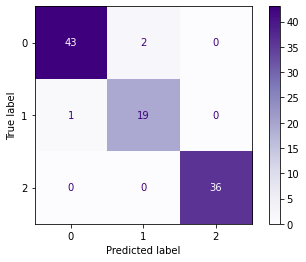

In [19]:
Actual              = IndexClass
Prediced            = ArgMax

confusion_matrix(Actual, Prediced)
C_M = confusion_matrix(Actual, Prediced)
C_M

disp = ConfusionMatrixDisplay(C_M)
disp.plot(cmap='Purples')
plt.show()

In [20]:
import  numpy                   as np
import  pandas                  as pd
import  matplotlib.pyplot       as plt

from    sklearn.metrics        import ConfusionMatrixDisplay
from    sklearn.metrics        import confusion_matrix
from    sklearn.naive_bayes    import GaussianNB

In [21]:
feature_NB  = train_df.iloc[:, 1:]
label_NB    = train_df.iloc[:, 0].apply(['Adelie', 'Chinstrap', 'Gentoo'].index)

In [22]:
N_test_data = test_df.shape[0]
clf_NB      = GaussianNB()
clf_NB.fit(feature_NB, label_NB);

In [23]:
label_Test  = test_df.iloc[:, 0].apply(['Adelie', 'Chinstrap', 'Gentoo'].index)
pred        = clf_NB.predict(test_df.iloc[:, 1:])
acc         = sum(pred == label_Test)/N_test_data

print(f'Naïve Bayes Accuracy(Using library) = {acc}')

Naïve Bayes Accuracy(Using library) = 0.9702970297029703


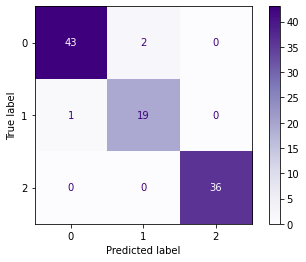

In [24]:
Actual              = label_Test
Prediced            = pred

confusion_matrix(Actual, Prediced)
C_M = confusion_matrix(Actual, Prediced)
C_M

disp = ConfusionMatrixDisplay(C_M)
disp.plot(cmap='Purples')
plt.show()